# Computational Posterior

```{contents} Table of Contents
:depth: 3
```


\begin{align}
    \beta &\sim \text{Beta}(2,5) ; \;  
    \gamma \sim \text{Beta}(2,8) \\ 
    S_{0}&=990 ; I_{0} = 10; R_{0} = 0\\
    S,I,R,\Delta I &= ODE( [S_{0},I_{0}, R_{0}; \beta, \gamma]  ) \\ 
    (\Delta i)_{t} &\sim \text{Pois}( \Delta I_{t} )
\end{align}



\begin{align}
    p(\beta, \gamma) &= p(\beta) \times p(\gamma) \\ 
    &= \frac{1}{\text{Beta}(2,5)} \beta^{2-1} (1-\beta)^{5-1} \times  \frac{1}{\text{Beta}(2,8)} \gamma^{2-1} (1-\gamma)^{8-1}
\end{align}




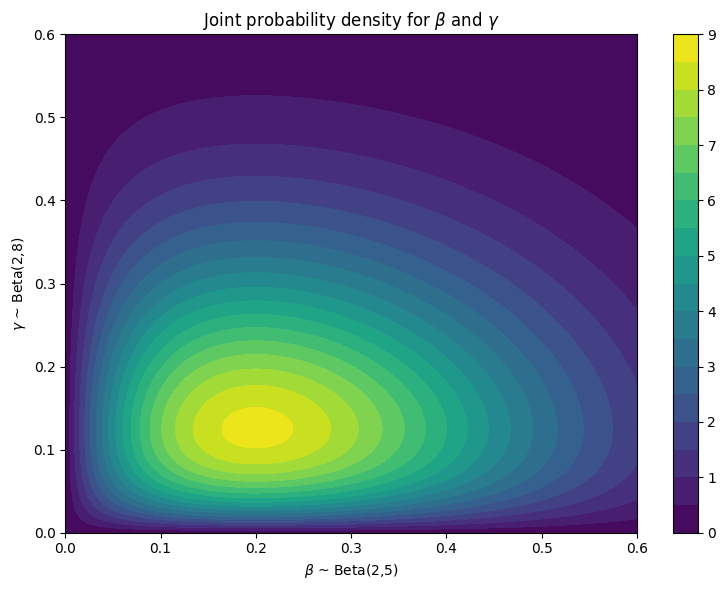

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the two Beta distributions
a1, b1 = 2, 5  # For X
a2, b2 = 2, 8  # For Y

# Grid over [0,1] x [0,1]
x = np.linspace(0., 0.6, 200)
y = np.linspace(0, 0.6, 200)
X, Y = np.meshgrid(x, y)

# Compute the marginal PDFs
f_X = beta.pdf(X, a1, b1)
f_Y = beta.pdf(Y, a2, b2)

# Compute the joint PDF (independent case)
Z = f_X * f_Y

# Plot
fig = plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z, levels=20)
plt.colorbar(cp)
plt.title(r'Joint probability density for $\beta$ and $\gamma$')
plt.xlabel(r'$\beta$ ~ Beta(2,5)')
plt.ylabel(r'$\gamma$ ~ Beta(2,8)')
plt.tight_layout()
plt.show()





\begin{align}
    X       &\sim f_{X} \\ 
    supp(X) &= [a,b] \\ 
\end{align}

\begin{align}
    P(X < x) &= \int_{a}^{x} f_{X} \; dx \\ 
             &\approx \sum_{x_{i} \in [a, a + (x-a)/N, a + 2*(x-a)/N, \cdots, x] } f(x_{i}) \left( \frac{x-a}{N} \right) \\
\end{align}

\begin{align}
             P(X < x) &= \sum_{x_{i} \in [a, a + (x-a)/N, a + 2*(x-a)/N, \cdots, x] } f(x_{i}) \Delta x \\
             \Delta x = \frac{x-a}{N}
\end{align}


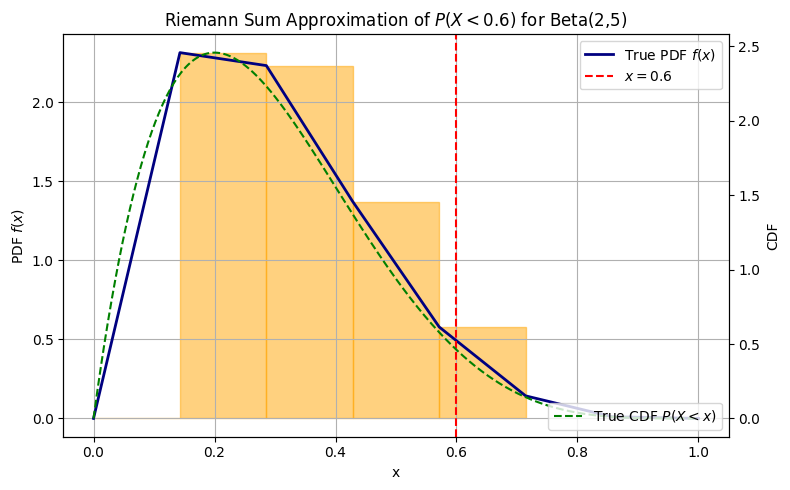

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Beta distribution parameters
a, b = 2, 5
x_val = 0.6
N = 8

x_grid = np.linspace(0, 1, N)
delta_x = x_grid[1] - x_grid[0]
pdf_vals = beta.pdf(x_grid, a, b)

# Mask for x <= x_val
mask = x_grid <= x_val

# Approximate the CDF with Riemann sum
cdf_approx = np.sum(pdf_vals[mask]) * delta_x
cdf_true = beta.cdf(x_val, a, b)

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 5))

# Plot PDF as smooth curve
ax.plot(x_grid, pdf_vals, label='True PDF $f(x)$', color='navy', linewidth=2)

# Plot rectangles (left Riemann sum)
for xi, fi in zip(x_grid[mask], pdf_vals[mask]):
    ax.add_patch(plt.Rectangle((xi, 0), delta_x, fi, color='orange', alpha=0.5))

# Vertical line at x = 0.6
ax.axvline(x_val, color='red', linestyle='--', label=r'$x = 0.6$')

# Labels and legend
ax.set_xlabel('x')
ax.set_ylabel('PDF $f(x)$')
ax.set_title('Riemann Sum Approximation of $P(X < 0.6)$ for Beta(2,5)')
ax.legend()
ax.grid(True)


ax2 = ax.twinx()
x_grid = np.linspace(0, 1, 500)

cdf_vals = beta.pdf(x_grid, a, b)
ax2.plot(x_grid, cdf_vals, 'g--', label='True CDF $P(X < x)$')
ax2.set_ylabel('CDF')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()



\begin{align}
    p( \beta, \gamma | \mathcal{D} ) = \frac{p(\mathcal{D} |\beta, \gamma ) p(\beta, \gamma)}{ \int_{\beta=0}^{\infty} \int_{\gamma=0}^{\infty} p(\mathcal{D} |\beta, \gamma ) p(\beta, \gamma) \; d \gamma d \beta } \\ 
\end{align}

\begin{align}
    p(\mathcal{D} |\beta, \gamma ) = \text{Pois}( \Delta I_{1} )[(\Delta i)_{1}] \times \text{Pois}( \Delta I_{2} )[(\Delta i)_{2}] \times \cdots \times  \text{Pois}( \Delta I_{T} )[(\Delta i)_{T}] = \prod_{t=1}^{T} \text{Pois}( \Delta I_{t} )[(\Delta i)_{t}] \\ 
\end{align}


\begin{align}
    p(\mathcal{D} |\beta, \gamma )p(\beta, \gamma)  &= \prod_{t=1}^{T} \text{Pois}( \Delta I_{t} )[(\Delta i)_{t}] \times \left[ \frac{1}{\text{Beta}(2,5)} \beta^{2-1} (1-\beta)^{5-1} \times  \frac{1}{\text{Beta}(2,8)} \gamma^{2-1} (1-\gamma)^{8-1} \right]
\end{align}

\begin{align}
    \int_{\beta=0}^{\infty} \int_{\gamma=0}^{\infty} p(\mathcal{D} |\beta, \gamma ) p(\beta, \gamma) \; d \gamma d \beta 
     & = \int_{\beta=0}^{\infty} \int_{\gamma=0}^{\infty} p(\mathcal{D} |\beta, \gamma ) p(\beta) p(\gamma) \; d \gamma d \beta  \\ 
     & = \int_{\beta=0}^{\infty} p(\beta) \left[ \int_{\gamma=0}^{\infty} p(\mathcal{D} |\beta, \gamma )  p(\gamma) \; d \gamma \right] d \beta  \\ 
\end{align}


\begin{align}
     \int_{\beta=0}^{\infty} p(\beta) \left[ \int_{\gamma=0}^{\infty} p(\mathcal{D} |\beta, \gamma )  p(\gamma) \; d \gamma \right] d \beta  \\ 
     \approx \sum_{\beta \in B} p(\beta) \Delta \beta \left[ \sum_{\gamma \in G} p(\mathcal{D} |\beta, \gamma )  p(\gamma) \Delta \gamma   \;  \right]  \\ 
\end{align}
where $B$ is some discrete set of points over the support of $\beta$ and $G$ is a discrete set of points over the support of $\gamma$. 

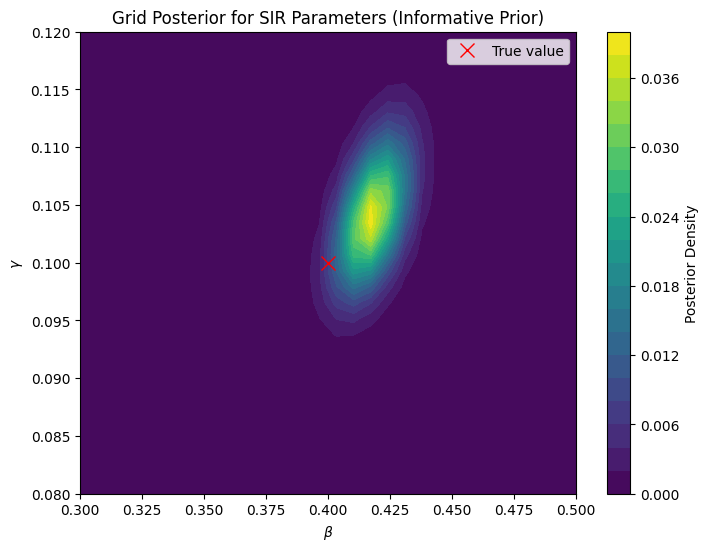

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Simulate "true" data
beta_true = 0.4
gamma_true = 0.1
N = 1000
I0 = 10
R0 = 0
S0 = N - I0 - R0
T = 30

S = [S0]
I = [I0]
R = [R0]

for t in range(T):
    new_infected = beta_true * S[-1] * I[-1] / N
    new_recovered = gamma_true * I[-1]
    
    S.append(S[-1] - new_infected)
    I.append(I[-1] + new_infected - new_recovered)
    R.append(R[-1] + new_recovered)

sigma = 50
I_obs = np.array(I) + np.random.normal(0, sigma, size=(T+1,))

# Define grid
beta_grid = np.linspace(0.3, 0.5, 30)
gamma_grid = np.linspace(0.08, 0.12, 30)

posterior = np.zeros((len(beta_grid), len(gamma_grid)))

# Prior distributions
beta_prior  = scipy.stats.beta(2,5)
gamma_prior = scipy.stats.beta(2,8)

# Evaluate posterior
for i, beta in enumerate(beta_grid):
    for j, gamma in enumerate(gamma_grid):
        
        # simulate model
        S_pred = [S0]
        I_pred = [I0]
        R_pred = [R0]
        
        for t in range(T):
            new_infected = beta * S_pred[-1] * I_pred[-1] / N
            new_recovered = gamma * I_pred[-1]
            
            S_pred.append(S_pred[-1] - new_infected)
            I_pred.append(I_pred[-1] + new_infected - new_recovered)
            R_pred.append(R_pred[-1] + new_recovered)
        
        I_pred = np.array(I_pred)
        
        # likelihood
        log_likelihood = np.sum(scipy.stats.norm(I_pred, sigma).logpdf(I_obs))
        
        # prior
        log_prior_beta  = beta_prior.logpdf(beta)
        log_prior_gamma = gamma_prior.logpdf(gamma)
        
        log_prior = log_prior_beta + log_prior_gamma
        
        posterior[i,j] = np.exp(log_likelihood + log_prior)

# Normalize posterior
d_beta = beta_grid[1] - beta_grid[0]
d_gamma = gamma_grid[1] - gamma_grid[0]

posterior *= d_beta * d_gamma
posterior /= np.sum(posterior)

# Plot posterior
plt.figure(figsize=(8,6))
B, G = np.meshgrid(beta_grid, gamma_grid, indexing='ij')
plt.contourf(B, G, posterior, levels=20)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title('Grid Posterior for SIR Parameters (Informative Prior)')
plt.colorbar(label='Posterior Density')
plt.plot(beta_true, gamma_true, 'rx', markersize=10, label='True value')
plt.legend()
plt.show()